# Exploring lightcurves

21 May 2025

In [16]:
import numpy as np
import lightkurve as lk
import astropy.units as u
from astropy.units import cds
import matplotlib.pyplot as plt
#%matplotlib notebook

Just an example on how to  download long-cadence Kepler's data (nearly four years of observations!).

In [35]:
# Pick a star
search_result = lk.search_lightcurve('KIC5024043', mission='Kepler', author='Kepler', cadence='long')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr005024043,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr005024043,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr005024043,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr005024043,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr005024043,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr005024043,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr005024043,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr005024043,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr005024043,0.0


We look at the data

<IPython.core.display.Javascript object>


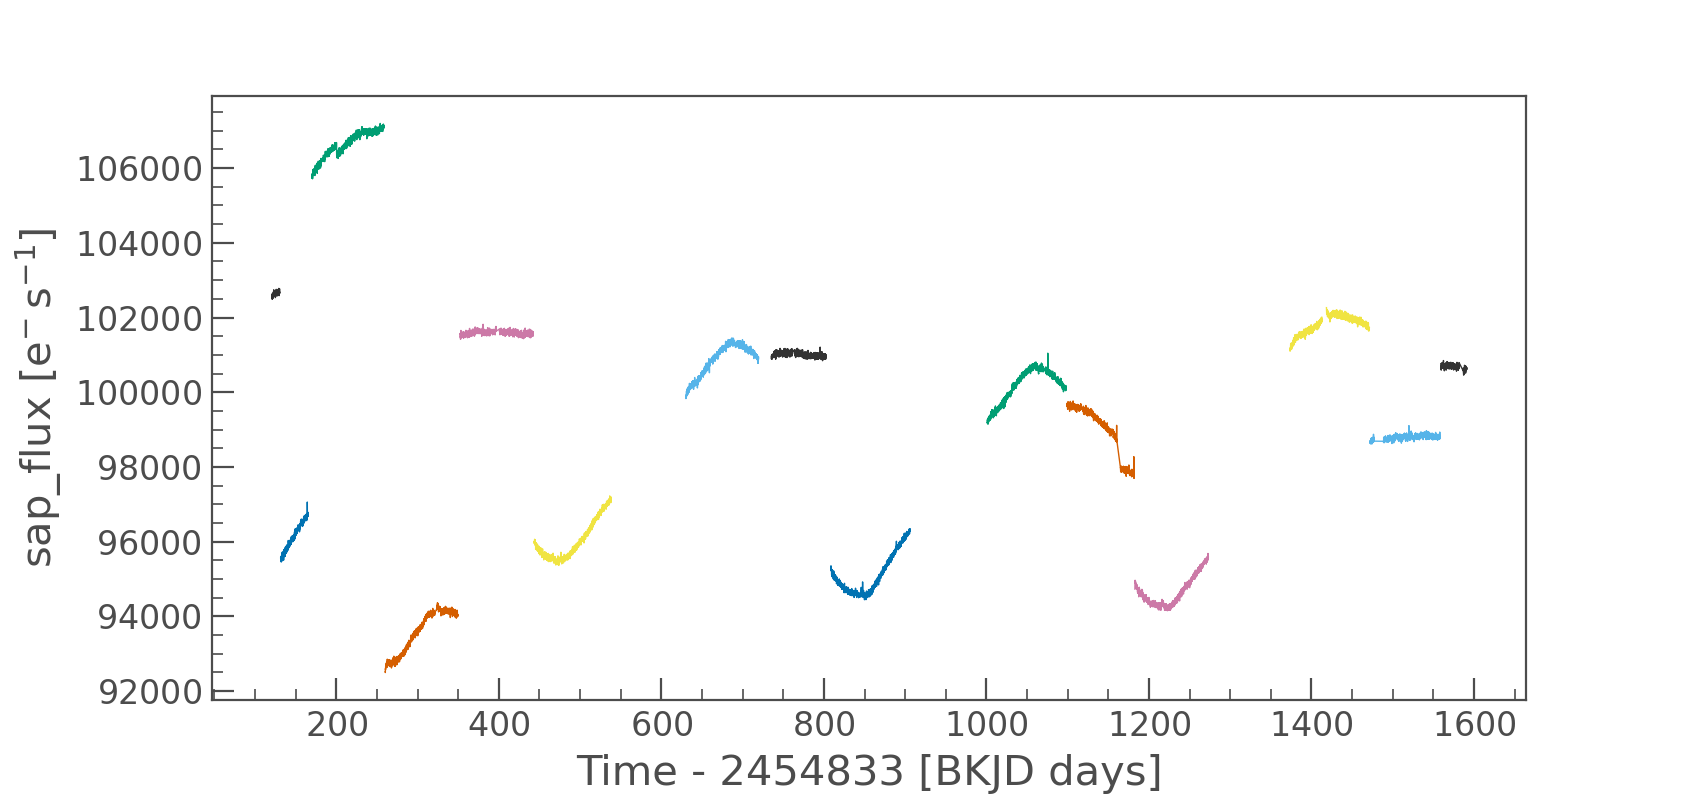

In [36]:
lc_collection = search_result.download_all()
ax = lc_collection[0].plot(column='sap_flux', label=None)
for lc in lc_collection[1:]:
    lc.plot(ax=ax, column='sap_flux', label=None)

and stich the lightcurves together (see the documentation on https://docs.lightkurve.org)

<IPython.core.display.Javascript object>


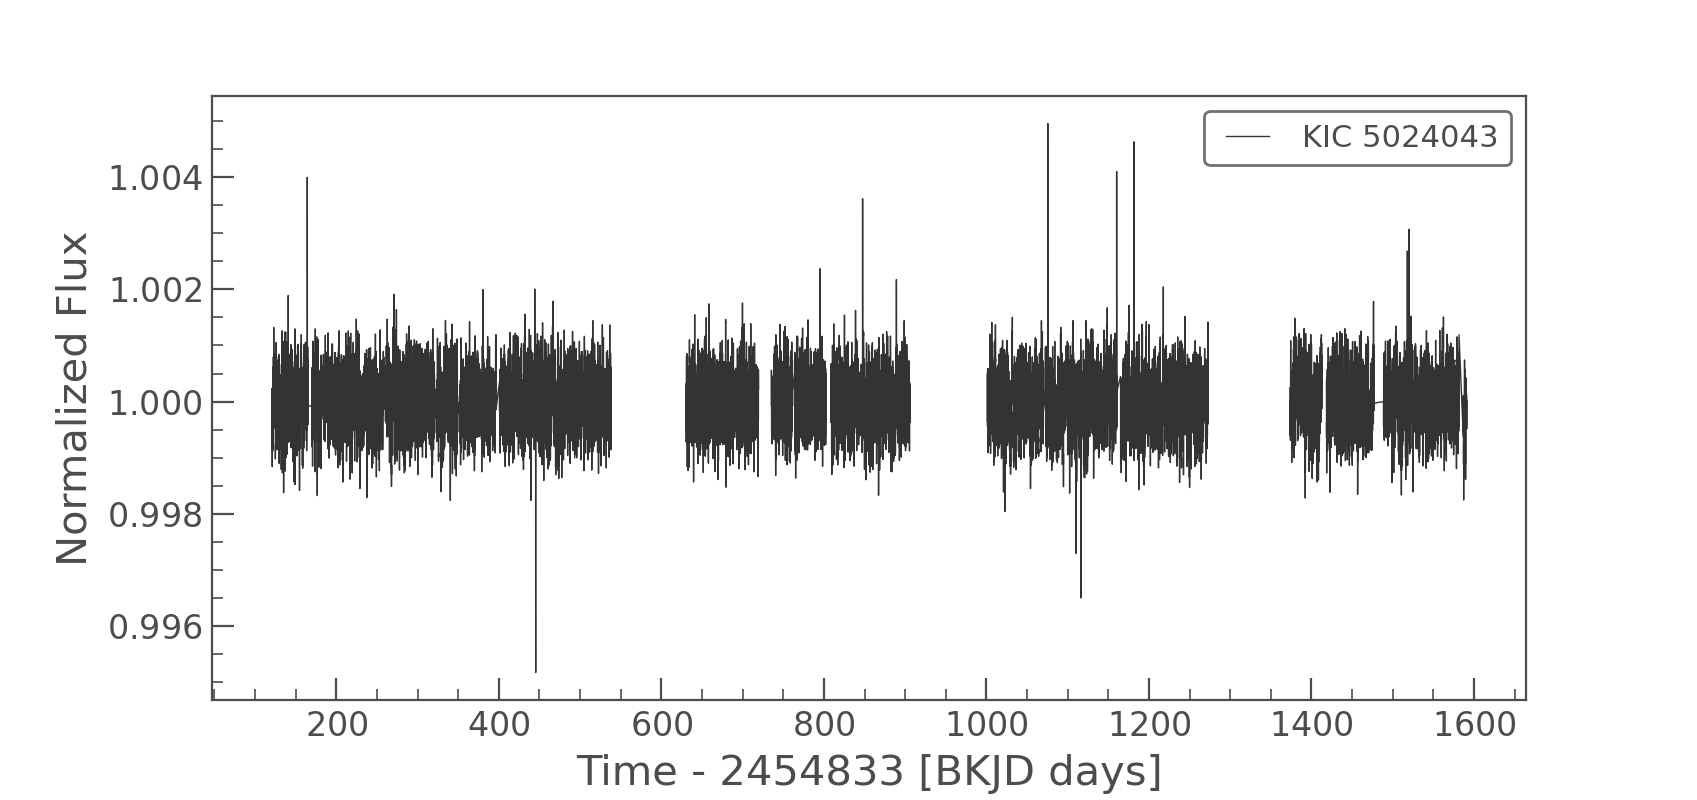

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.53888184947573,9.9962145e-01,8.4751584e-05,0,7.294295e-04,563.98575,901.43997,568,1.0256048e+05,8.9769430e+00,1.8196322e+03,5.0376534e-01,1.0944939e+05,9.2795219e+00,0,———,———,———,———,563.98575,1.0564907e-04,901.43997,8.4366853e-05,-1.6206679e-03,-4.0133307e-03
120.55931644139491,9.9963295e-01,8.5451204e-05,0,7.304214e-04,563.98606,901.44047,569,1.0257680e+05,8.9775362e+00,1.8191005e+03,5.0548774e-01,1.0945065e+05,9.3561239e+00,0,———,———,———,———,563.98606,1.0562789e-04,901.44047,8.4359679e-05,-1.4290562e-03,-3.4962907e-03
120.57975093337154,9.9956053e-01,8.5453001e-05,0,7.314134e-04,563.98641,901.44017,570,1.0256470e+05,8.9770336e+00,1.8204982e+03,5.0349736e-01,1.0944272e+05,9.3563204e+00,0,———,———,———,———,563.98641,1.0562980e-04,901.44017,8.4364881e-05,-1.0637811e-03,-3.6992491e-03
120.60018562528421,9.9967551e-01,8.5710715e-05,0,7.324053e-04,563.98709,901.44026,571,1.0257266e+05,8.9772720e+00,1.8186395e+03,5.0390178e-01,1.0945530e+05,9.3845377e+00,0,———,———,———,———,563.98709,1.0562922e-04,901.44026,8.4353072e-05,-2.8437356e-04,-3.5621829e-03
120.6206202172034,9.9979508e-01,8.5875508e-05,0,7.333972e-04,563.98695,901.44024,572,1.0258223e+05,8.9776525e+00,1.8193876e+03,5.0479287e-01,1.0946840e+05,9.4025812e+00,0,———,———,———,———,563.98695,1.0560535e-04,901.44024,8.4355619e-05,4.3802793e-05,-3.5495581e-03
120.64105470912182,9.9950194e-01,8.5911262e-05,0,7.343891e-04,563.98755,901.44000,573,1.0255061e+05,8.9764547e+00,1.8174492e+03,5.0508499e-01,1.0943630e+05,9.4064960e+00,0,———,———,———,———,563.98755,1.0563337e-04,901.44000,8.4361869e-05,5.2946148e-04,-3.8720409e-03
120.66148930103373,9.9950194e-01,8.5779335e-05,0,7.353810e-04,563.98762,901.44025,574,1.0254914e+05,8.9765320e+00,1.8207468e+03,5.0435084e-01,1.0943630e+05,9.3920507e+00,0,———,———,———,———,563.98762,1.0563018e-04,901.44025,8.4379171e-05,6.7666039e-04,-3.4954546e-03
120.68192399295367,9.9957168e-01,8.5909036e-05,0,7.363730e-04,563.98751,901.44009,575,1.0255728e+05,8.9767036e+00,1.8195881e+03,5.0400263e-01,1.0944394e+05,9.4062519e+00,0,———,———,———,———,563.98751,1.0561647e-04,901.44009,8.4370477e-05,6.6497608e-04,-3.5928222e-03


In [26]:
lcobs = search_result.download_all().stitch()
lcobs.plot()
lcobs

In [14]:
lcobs.meta

OrderedDict([('INHERIT', True),
             ('EXTNAME', 'PRIMARY'),
             ('EXTVER', 1),
             ('TELESCOP', 'Kepler'),
             ('INSTRUME', 'Kepler Photometer'),
             ('OBJECT', 'KIC 6032981'),
             ('KEPLERID', 6032981),
             ('RADESYS', 'ICRS'),
             ('RA_OBJ', 288.68258),
             ('DEC_OBJ', 41.30732),
             ('EQUINOX', 2000.0),
             ('EXPOSURE', 29.27250211),
             ('TIMEREF', 'SOLARSYSTEM'),
             ('TASSIGN', 'SPACECRAFT'),
             ('TIMESYS', 'TDB'),
             ('BJDREFI', 2454833),
             ('BJDREFF', 0.0),
             ('TIMEUNIT', 'd'),
             ('TELAPSE', 31.79599367),
             ('LIVETIME', 29.27250211),
             ('TSTART', 1559.21586726),
             ('TSTOP', 1591.01186094),
             ('LC_START', 56391.72690412),
             ('LC_END', 56423.50115222),
             ('DEADC', 0.92063492),
             ('TIMEPIXR', 0.5),
             ('TIERRELA', 5.78e-07),
   

<IPython.core.display.Javascript object>


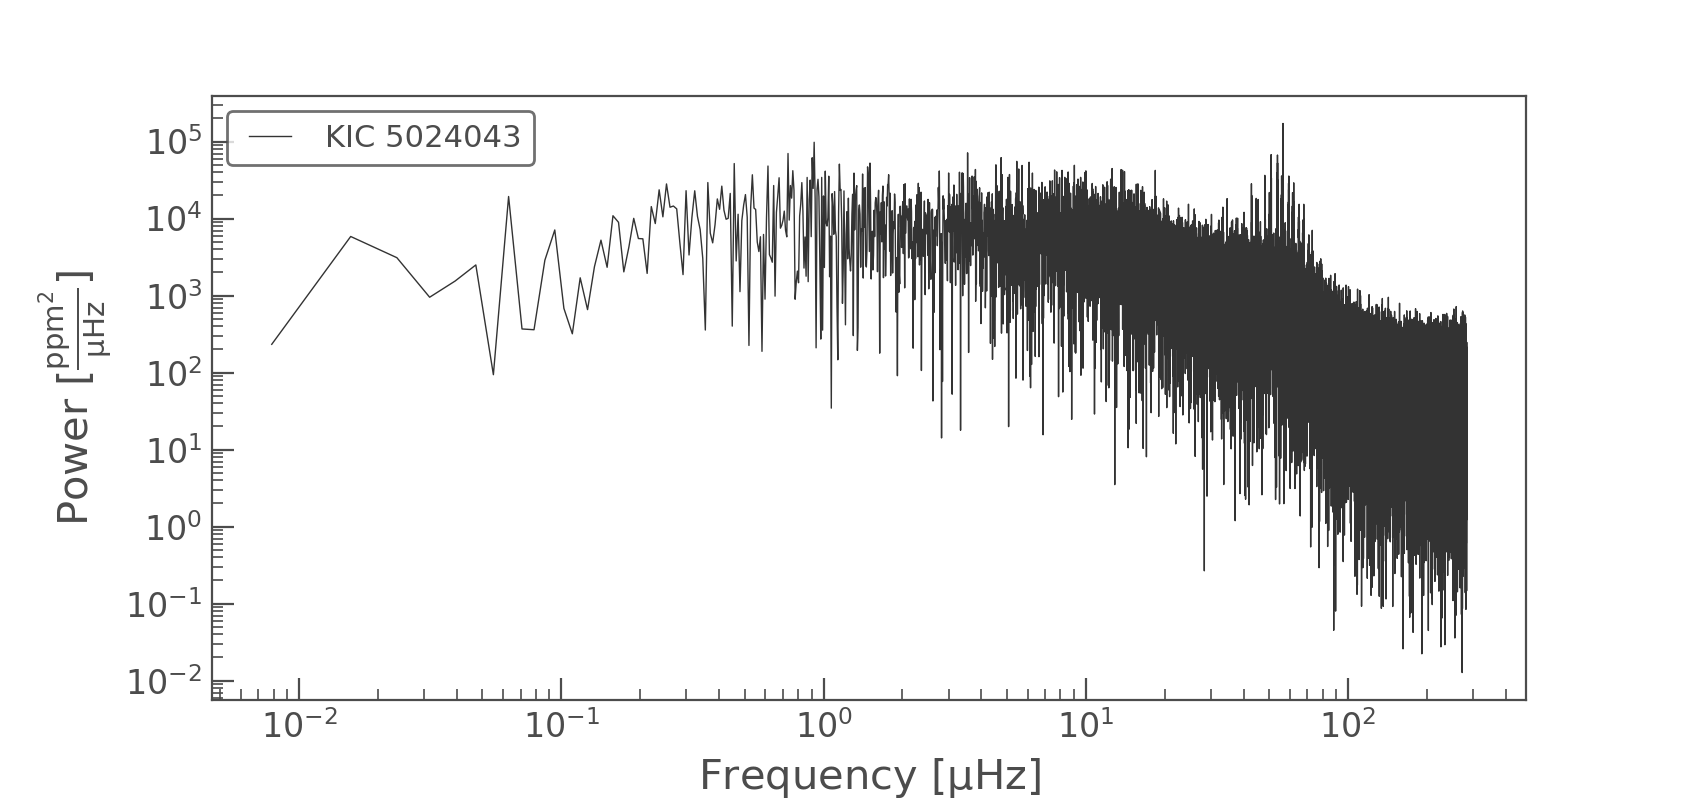

<IPython.core.display.Javascript object>


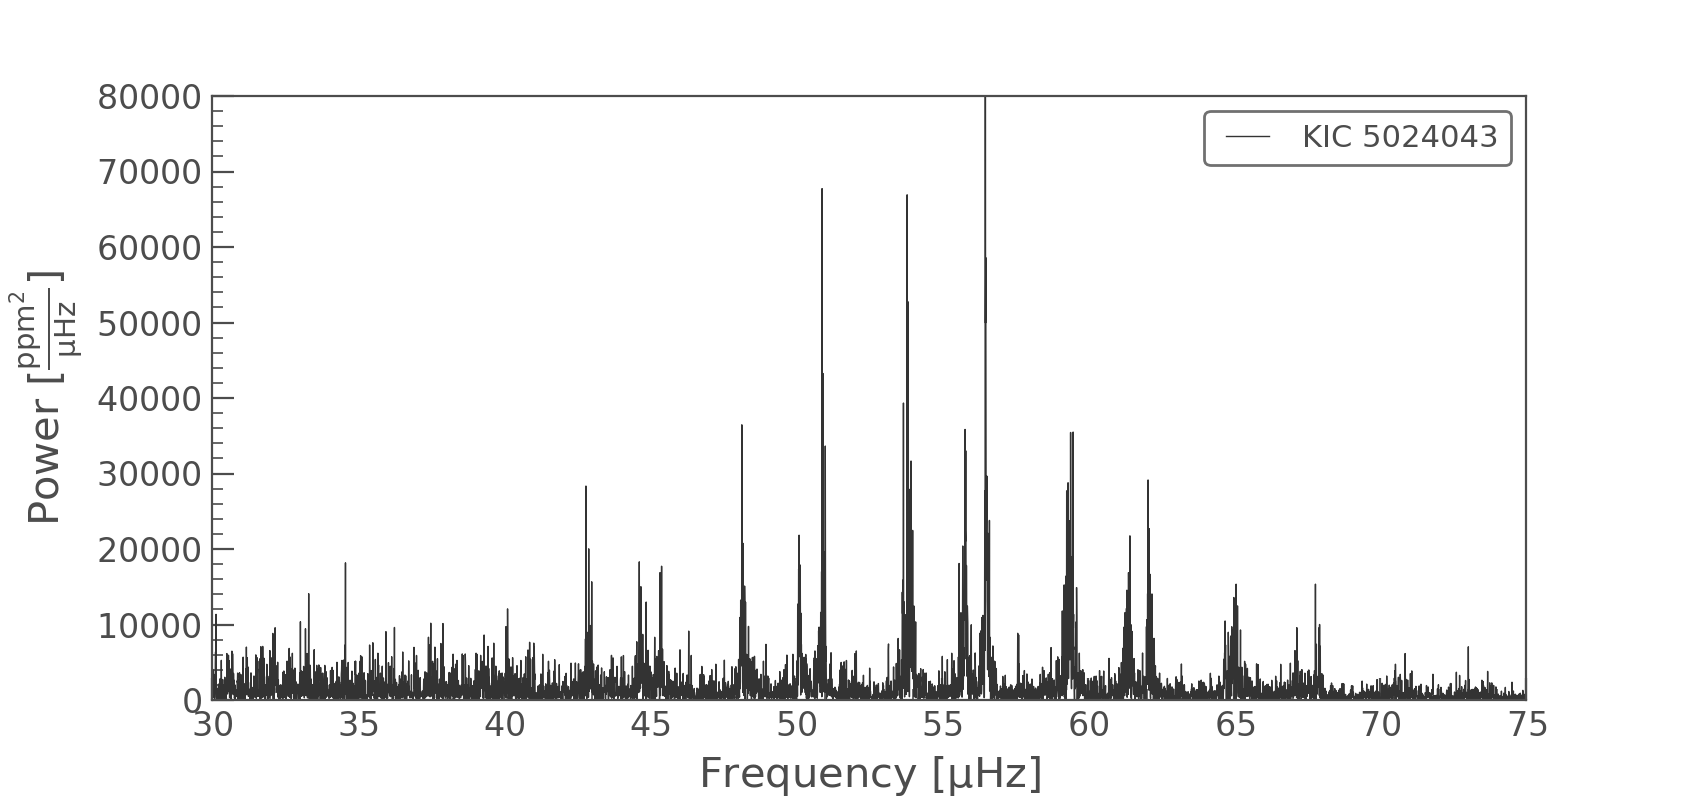

(0.0, 80000.0)

In [28]:
pobs = lcobs.normalize('ppm').to_periodogram(ls_method ='auto',normalization='psd')
pobs.plot(scale='log')

ax = pobs.plot()
ax.set_xlim(30,75)
ax.set_ylim(0,80000)

generate and plot a smoothed PSD

<IPython.core.display.Javascript object>


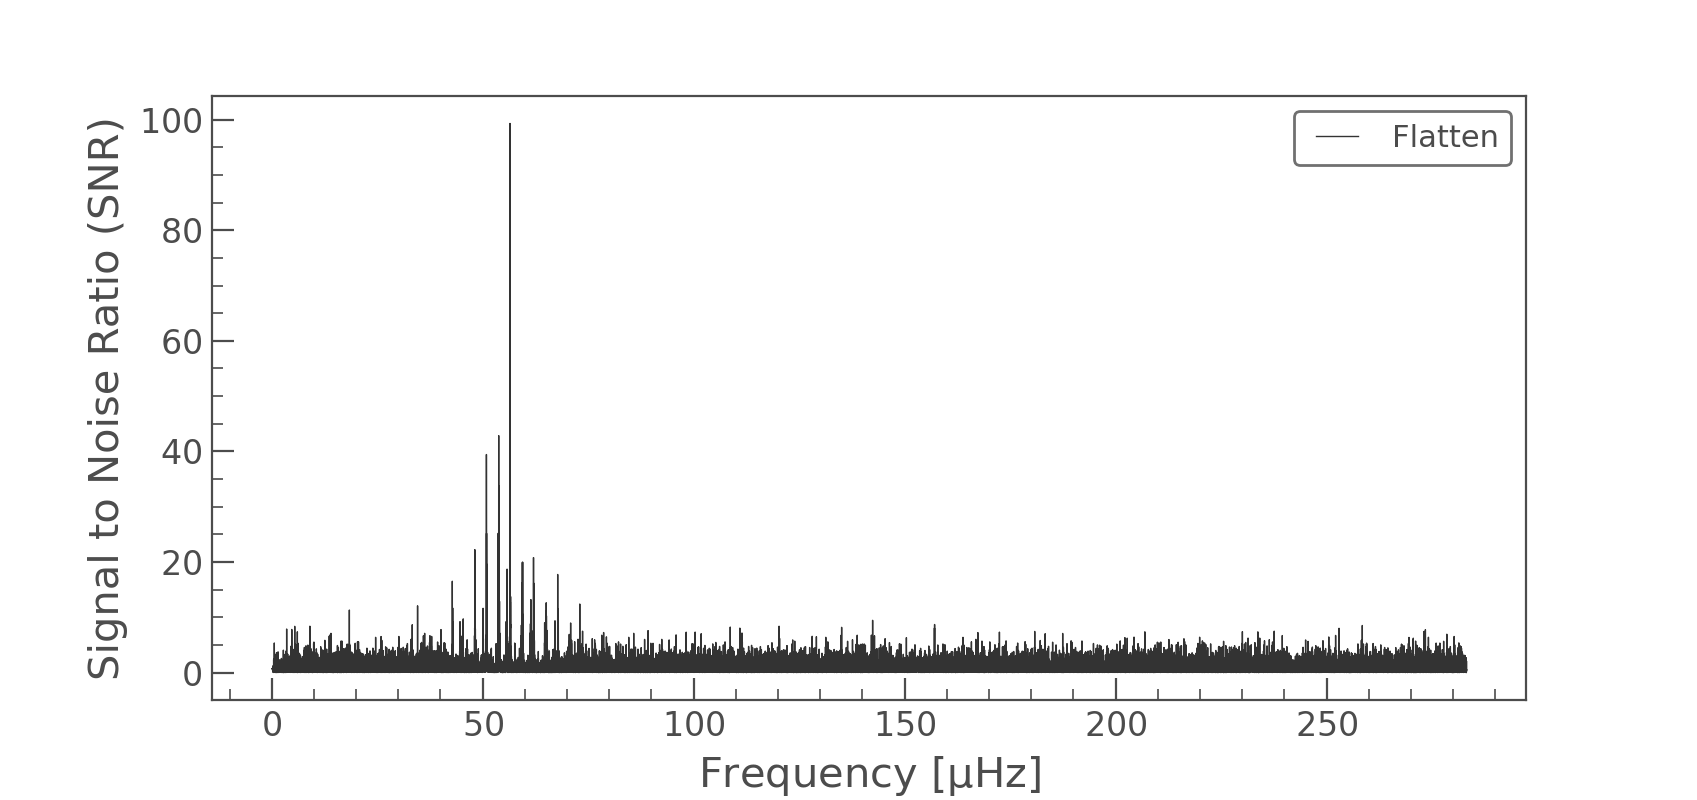

<IPython.core.display.Javascript object>


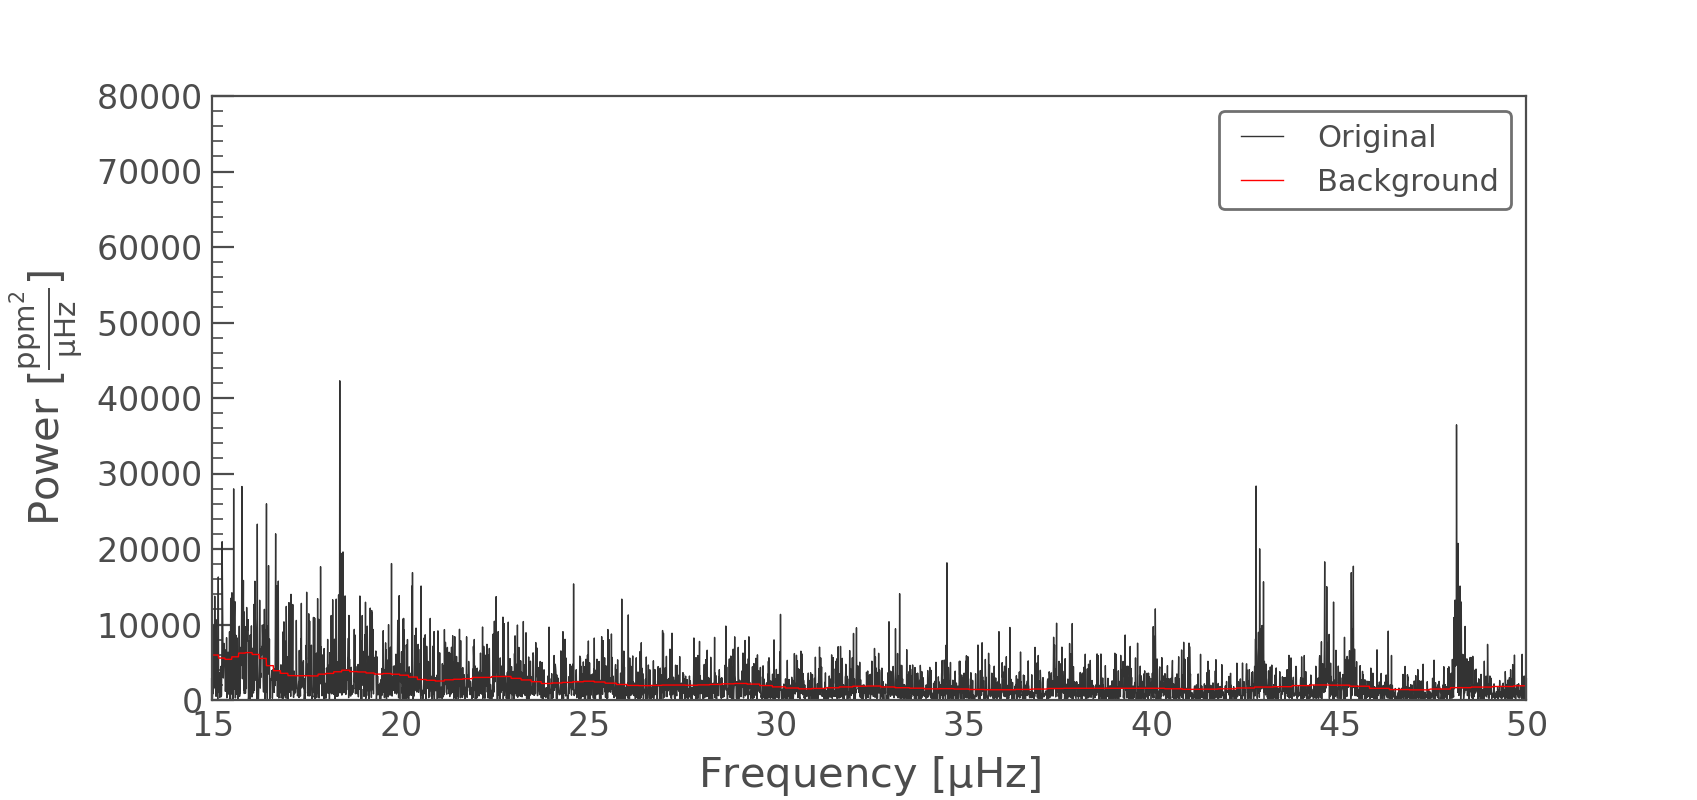

<IPython.core.display.Javascript object>


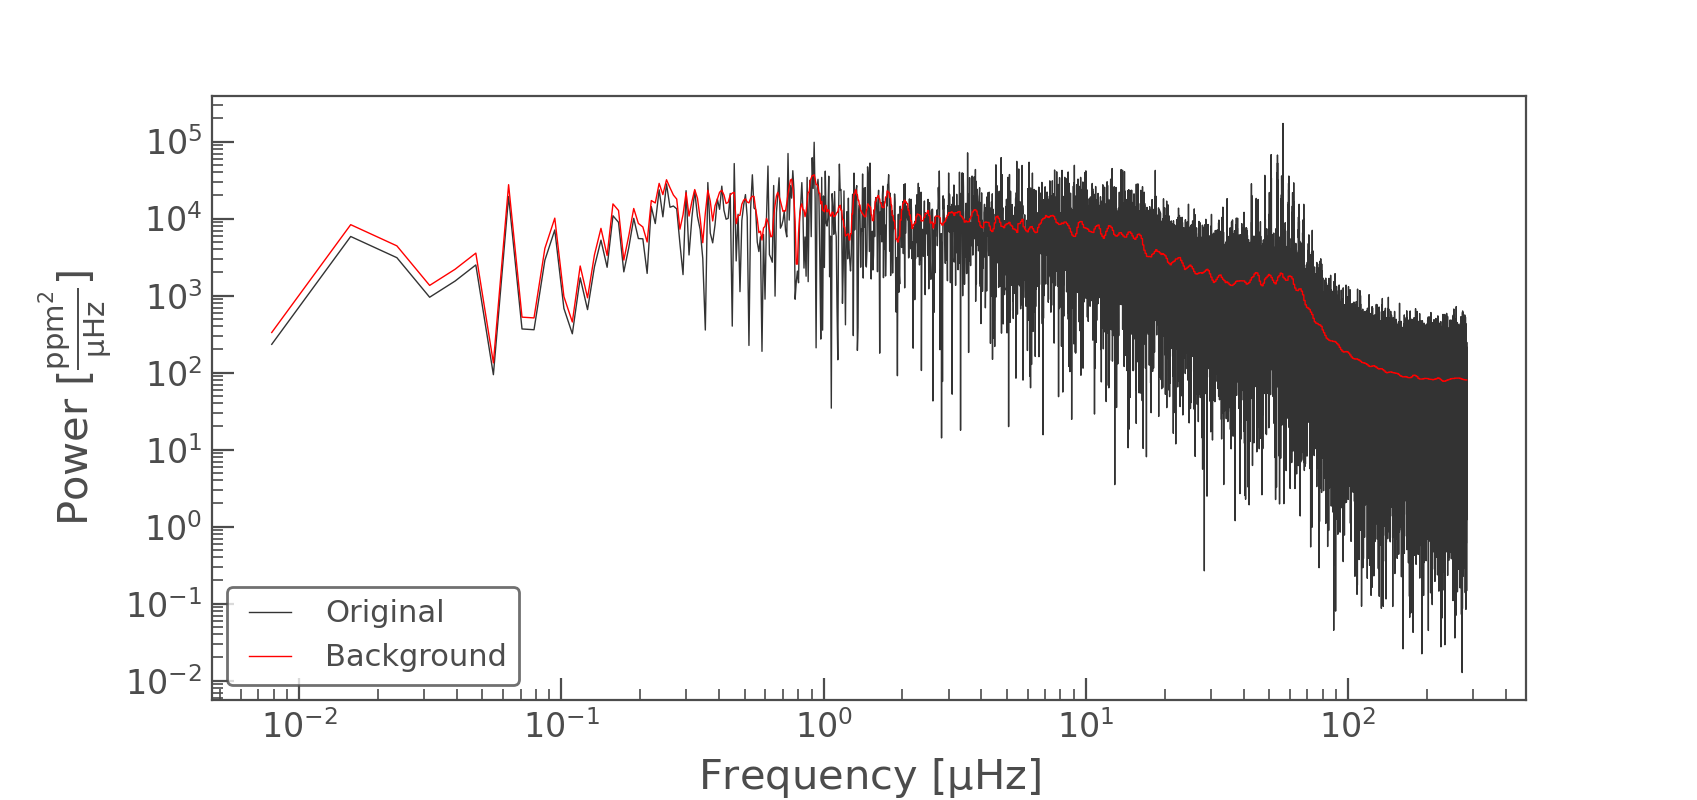

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{\\frac{ppm^{2}}{\\mu Hz}}$]'>

In [29]:
pobs_flatten = pobs.flatten(return_trend=True)

pobs_flatten[0].plot(label='Flatten')
ax = pobs.plot(label='Original')
pobs_flatten[1].plot(ax = ax,label='Background',color ='r')
ax.set_xlim(15,50)
ax.set_ylim(0,80000)

ax = pobs.plot(label='Original')
pobs_flatten[1].plot(ax=ax,label='Background',color ='r',scale='log')


<IPython.core.display.Javascript object>


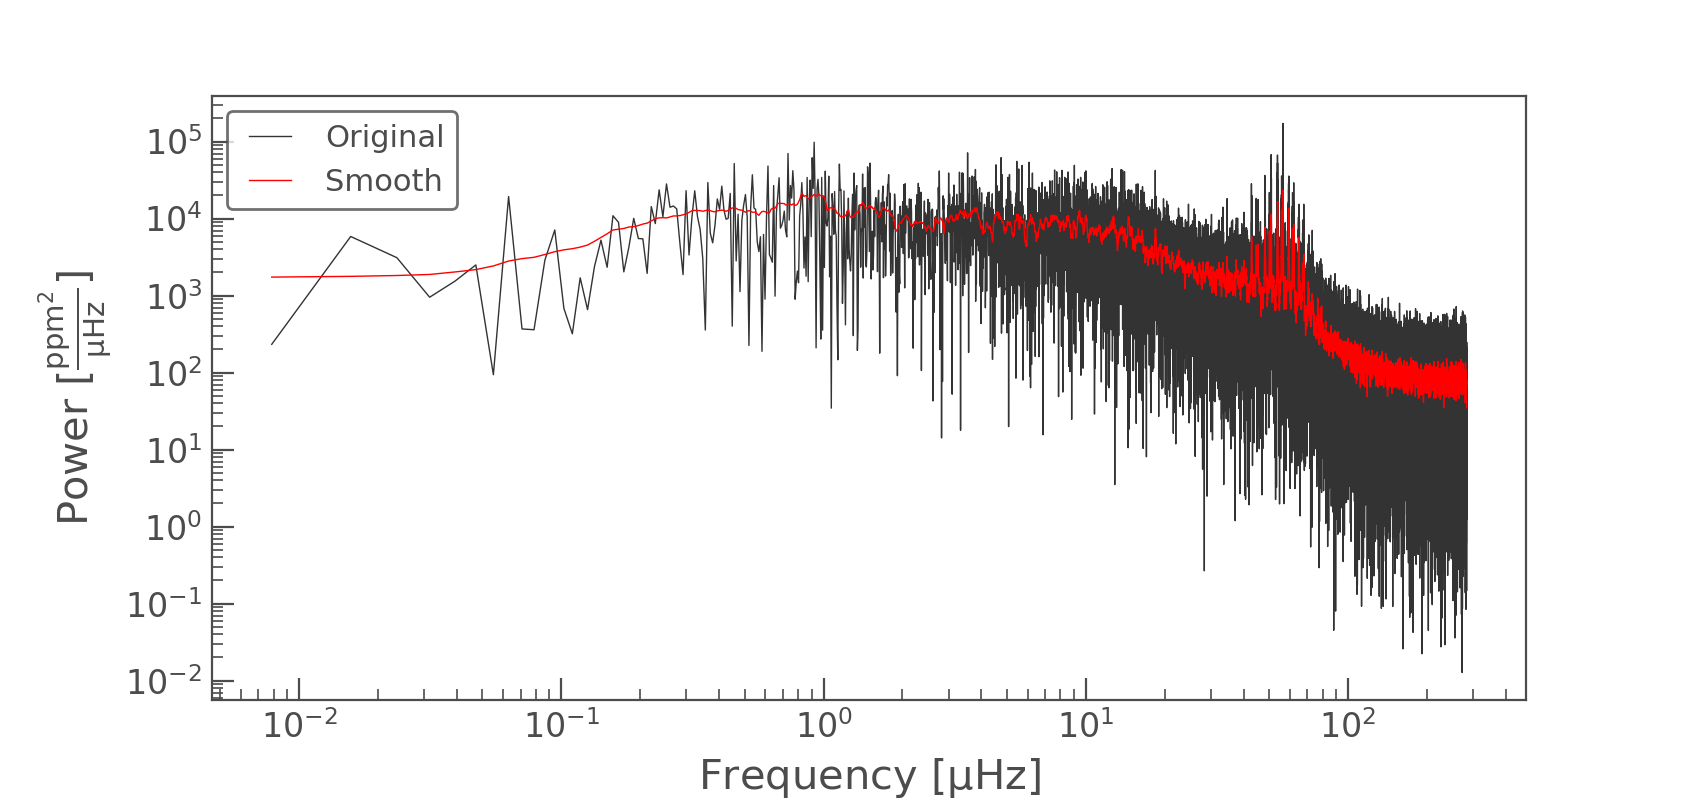

<IPython.core.display.Javascript object>


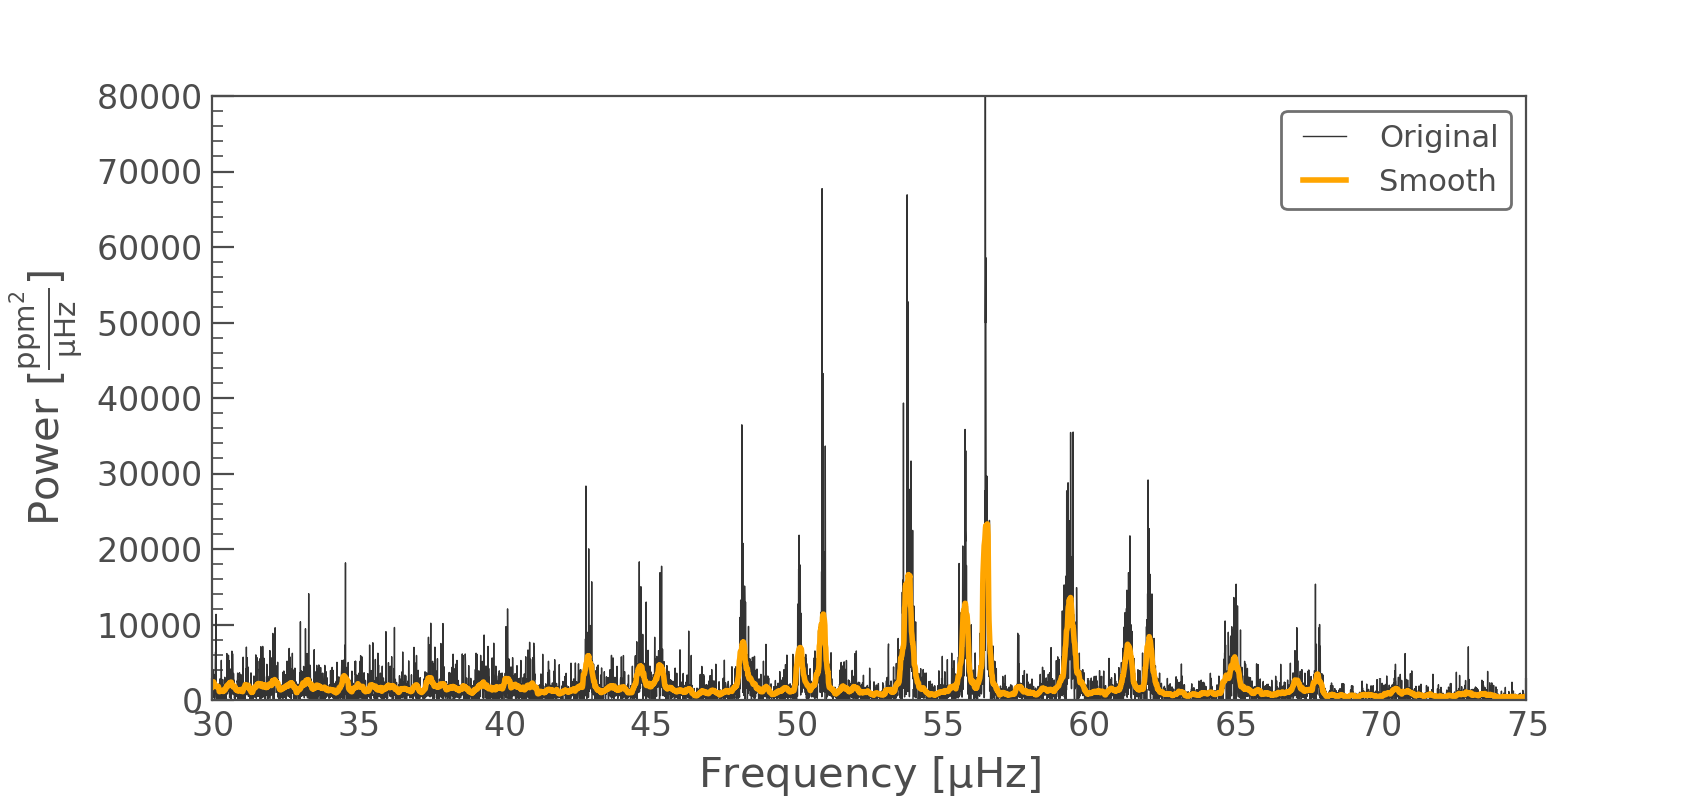

(0.0, 80000.0)

In [34]:
smooth_pobs = pobs.smooth(method='boxkernel', filter_width=0.2)#, 0.5

ax = pobs.plot(label='Original')
smooth_pobs.plot(ax= ax,label='Smooth',scale = 'log', color='r')

ax = pobs.plot(label='Original')
smooth_pobs.plot(ax= ax,label='Smooth', color='orange', lw=2)
ax.set_xlim(30,75)
ax.set_ylim(0,80000)

* you can now try to estimate the mass and radius of the star following https://docs.lightkurve.org/tutorials/3-science-examples/asteroseismology-estimating-mass-and-radius.html

# More examples to try
*   16 CygA (usare l'opzione `cadence='short'` quando fate il download dei dati)
*   KIC 1161618
*   KIC 5271626
*   Kepler 91
*   KIC 9408694